# Analysis of Movie Run Time relative to primary outcome: Net Income # 

Importing Packages

In [1]:
#package import
import pandas as pd 
import matplotlib.pyplot as plt
import sqlite3

Specifying all file paths in one centralized locatio.

In [2]:
#file_paths
tn_budgets_file_path = './../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz'
imdb_file_path = './../Data/Phase_1_Project_Data/im.db'

Loading in our datasets

In [3]:
#Using pandas to create a dataframe from the tn.movie_budgets csv file
tn_budgets_df = pd.read_csv(tn_budgets_file_path)

In [4]:
# ensuring that the file was loaded correctly
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# creating a sqlite3 connection to be able to read in our SQL database 
conn = sqlite3.connect(imdb_file_path) 

# using pandas to read in our SQL database im.db
# SELECT * because we need to see what tables are in this database
imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)

In [6]:
# take a look at our dataframe to make sure it was read correctly
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
# Create a dataframe with the columns needed from the movie_basics table
imdb_table = pd.read_sql('''
                            SELECT
                               movie_basics.movie_id, movie_basics.primary_title, movie_basics.runtime_minutes
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                                WHERE is_original_title != 0.0
                               ''', conn)

In [8]:
# take a look at our dataframe to make sure it was read correctly
imdb_table.head()

,movie_id,primary_title,runtime_minutes
0,tt0369610,Jurassic World,124.0
1,tt0401729,John Carter,132.0
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.0
3,tt10027708,Miguelito,94.0
4,tt10050722,Thing I Don't Get,71.0


In [9]:
# Cleaning the production_budget column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [10]:
# Cleaning the domestic_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross'].str.replace(",","")
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].str[1:]
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].astype(float)

In [11]:
# Cleaning the worldwide_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [12]:
# Deleting all the rows that have a value of zero in the columns 'production_budget_float','worldwide_gross_float' 
# or 'domestic_gross_float'
tn_budgets_df = tn_budgets_df[tn_budgets_df['production_budget_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['worldwide_gross_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['domestic_gross_float'] != 0]

#sanity check
#tn_budgets_df.loc[tn_budgets_df['domestic_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['worldwide_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['production_budget_float'] == 0]

In [13]:
# creating a new column named 'net_income' that is equal to the worldwide gross minus the production budget
tn_budgets_df['net_income'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']

In [14]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09,9.997217e+08


Merging needed dataframes into one dataframe

In [15]:
# Joining the data frams 'tn_budgets_df and 'imdb_table' on the movie title
title_and_revenue_df = pd.merge(tn_budgets_df, imdb_table,left_on='movie',right_on='primary_title')
title_and_revenue_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,149.0


In [16]:
# Here I am dropping all the rows in our dataframe where 'net_income' is NAN
title_and_revenue_df = title_and_revenue_df.dropna(subset=['net_income'])

# Here I am dropping all the duplicates
title_and_revenue_df = title_and_revenue_df.drop_duplicates(subset='movie')

#sanity checks
#title_and_revenue_df['movie'].value_counts()
#title_and_revenue_df['movie'].isnull().sum()

In [17]:
# Here I am taking a look at the minimum & maximum values in the 'runtime_minutes' column
max_runtime = title_and_revenue_df['runtime_minutes'].max()
min_runtime = title_and_revenue_df['runtime_minutes'].min()

# Here I am creating a new series named run_time and sorting it, and taking a look at the min and max values
run_time = title_and_revenue_df['runtime_minutes']
run_time = run_time.sort_values(ascending=True)
print(run_time.head(10))
print(min_runtime,max_runtime)

937      6.0
1769    41.0
916     45.0
690     45.0
636     47.0
1067    52.0
1964    52.0
1502    52.0
1458    55.0
2045    58.0
Name: runtime_minutes, dtype: float64
6.0 180.0


Text(0.5, 1.0, 'Runtime vs Net Income')

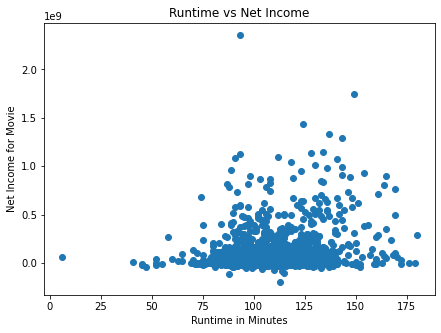

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x = title_and_revenue_df['runtime_minutes'],y = title_and_revenue_df['net_income'])
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Net Income for Movie')
ax.set_title('Runtime vs Net Income')
#plt.scatter(title_and_revenue_df['runtime_minutes'],title_and_revenue_df['gross_revenue']);

In [19]:
# Here I am taking a look at the rows where there wasa net loss
title_and_revenue_df.loc[title_and_revenue_df['net_income'] < 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,149762350.0,-200237650.0,tt6565702,Dark Phoenix,113.0
9,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",275000000.0,89302115.0,260002115.0,-14997885.0,tt1210819,The Lone Ranger,150.0
87,11,"May 12, 2017",King Arthur: Legend of the Sword,"$175,000,000","$39,175,066","$139,630,336",175000000.0,39175066.0,139630336.0,-35369664.0,tt1972591,King Arthur: Legend of the Sword,126.0
88,12,"Dec 25, 2013",47 Ronin,"$175,000,000","$38,362,475","$151,716,815",175000000.0,38362475.0,151716815.0,-23283185.0,tt1335975,47 Ronin,128.0
119,47,"Sep 30, 2016",Deepwater Horizon,"$156,000,000","$61,433,527","$122,603,824",156000000.0,61433527.0,122603824.0,-33396176.0,tt1860357,Deepwater Horizon,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,90,"Jun 19, 2014",The Past is a Grotesque Animal,"$100,000","$20,056","$20,056",100000.0,20056.0,20056.0,-79944.0,tt3072636,The Past is a Grotesque Animal,77.0
2110,4,"Jul 25, 2014",Happy Christmas,"$70,000","$30,312","$30,312",70000.0,30312.0,30312.0,-39688.0,tt2955096,Happy Christmas,82.0
2111,11,"Jan 25, 2013",Supporting Characters,"$60,000","$4,917","$4,917",60000.0,4917.0,4917.0,-55083.0,tt1874789,Supporting Characters,87.0
2113,20,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",50000.0,8374.0,8374.0,-41626.0,tt4462082,Counting,111.0


In [20]:
title_and_revenue_df.describe()

,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,runtime_minutes
count,1740.000000,1.740000e+03,1.740000e+03,1.740000e+03,1.740000e+03,1706.000000
mean,50.706322,4.292035e+07,5.431984e+07,1.330817e+08,9.016131e+07,106.460727
std,28.411752,5.375829e+07,8.226420e+07,2.291933e+08,1.901902e+08,18.071670
min,1.000000,9.000000e+03,3.880000e+02,5.280000e+02,-2.002376e+08,6.000000
25%,26.750000,8.500000e+06,5.028911e+06,1.017489e+07,-7.216118e+05,94.000000
50%,50.000000,2.350000e+07,2.719857e+07,4.862847e+07,2.149148e+07,104.000000
75%,75.000000,5.212500e+07,6.446344e+07,1.436015e+08,9.171415e+07,116.750000
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,180.000000


In [21]:
#binning by standard deviation, which you can see above - 18 minutes

def length(val):
    if val <= 18:
        return ">= 18 minutes"
    elif (val > 18) and (val <= 36):
        return "18 to 36 minutes"
    elif(val > 36) and (val <= 54):
        return "36 minutes to 54 minutes"
    elif (val > 54) and (val <= 72):
        return "54 minutes to 72 minutes"
    elif (val > 72) and (val <= 90):
        return "72 minutes to 90 minutes"
    elif (val > 90) and (val <= 108):
        return "90 minutes to 108 minutes"
    elif (val > 108) and (val <= 126):
        return "108 minutes to 126 minutes"
    elif (val > 126) and (val <= 144):
        return "126 minutes to 144 minutes"
    elif (val > 144) and (val <= 162):
        return "144 minutes to 162 minutes"
    elif (val > 162) and (val <= 180):
        return "162 minutes to 180 minutes"

In [27]:
title_and_revenue_df['runtime_minutes_binned'] = title_and_revenue_df['runtime_minutes'].map(length)

In [30]:
test = title_and_revenue_df.loc[title_and_revenue_df['runtime_minutes_binned'] == "18 to 36 minutes"]
test

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes,runtime_minutes_binned


In [36]:
new_df = title_and_revenue_df.groupby(by=['runtime_minutes_binned'],as_index=False).mean()
new_df



,runtime_minutes_binned,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,runtime_minutes
0,108 minutes to 126 minutes,51.198675,4.702362e+07,5.665464e+07,1.294777e+08,8.245408e+07,116.088300
1,126 minutes to 144 minutes,49.347059,8.171412e+07,1.064787e+08,2.839953e+08,2.022812e+08,133.611765
2,144 minutes to 162 minutes,35.058824,1.020647e+08,1.391160e+08,3.888850e+08,2.868203e+08,152.088235
3,162 minutes to 180 minutes,53.833333,8.781667e+07,9.809816e+07,3.294897e+08,2.416730e+08,168.888889
4,36 minutes to 54 minutes,53.571429,2.212857e+07,1.203578e+07,1.752709e+07,-4.601480e+06,47.714286
5,54 minutes to 72 minutes,40.941176,1.988400e+07,2.801348e+07,6.069635e+07,4.081235e+07,67.352941
6,72 minutes to 90 minutes,48.797619,2.516727e+07,3.350828e+07,7.481501e+07,4.964774e+07,85.523810
7,90 minutes to 108 minutes,52.336870,3.507933e+07,4.430846e+07,1.084895e+08,7.341012e+07,99.564987
8,>= 18 minutes,43.000000,2.800000e+07,6.730096e+07,9.450083e+07,6.650083e+07,6.000000


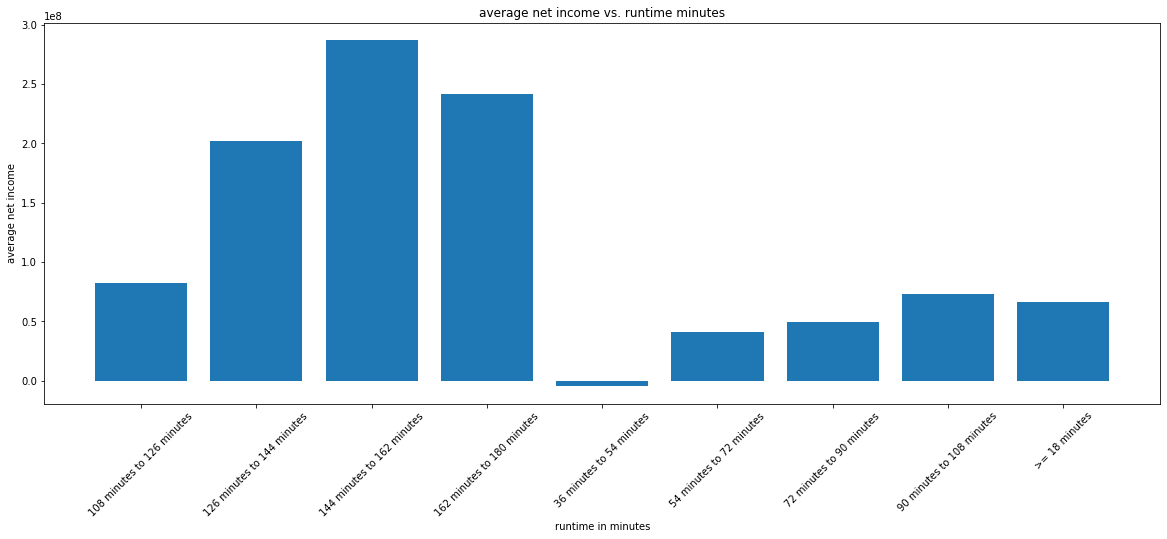

In [37]:
#plot these bins
fig,ax = plt.subplots(figsize = (20,7))
ax.bar(new_df['runtime_minutes_binned'],new_df['net_income'])
ax.set_xlabel('runtime in minutes')
ax.set_ylabel('average net income')
ax.set_title('average net income vs. runtime minutes')
plt.xticks(rotation=45);

In [24]:
# save visualization to desktop